# Brazil E-commerce Data Analysis
---

In [2]:
## EDA Standard Libary

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import statsmodels.stats as ss

In [3]:
#Import Data
df_products = pd.read_csv('/Users/Dwika/My Projects/Final Project Purwadhika/Dataset/olist_products_dataset.csv')
df_product_cat_translate = pd.read_csv('/Users/Dwika/My Projects/Final Project Purwadhika/Dataset/product_category_name_translation.csv')

In [4]:
#Order Data
df_order = pd.read_csv('/Users/Dwika/My Projects/Final Project Purwadhika/Dataset/olist_orders_dataset.csv')
df_order_items = pd.read_csv('/Users/Dwika/My Projects/Final Project Purwadhika/Dataset/olist_order_items_dataset.csv')

In [5]:
#Product Category translate merge
df_products = pd.merge(df_products, df_product_cat_translate, on='product_category_name')
df_products = df_products.drop(columns=['product_category_name'])
df_products

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,39.0,346.0,2.0,400.0,27.0,5.0,20.0,perfumery
2,0d009643171aee696f4733340bc2fdd0,52.0,150.0,1.0,422.0,21.0,16.0,18.0,perfumery
3,b1eae565a61935e0011ee7682fef9dc9,49.0,460.0,2.0,267.0,17.0,13.0,17.0,perfumery
4,8da90b37f0fb171b4877c124f965b1f6,56.0,733.0,3.0,377.0,18.0,13.0,15.0,perfumery
...,...,...,...,...,...,...,...,...,...
32323,13b25797ad1e6d6c7cd3cbeb35f8ee7a,44.0,348.0,1.0,18250.0,25.0,25.0,25.0,furniture_mattress_and_upholstery
32324,dc36a7859b743d8610a2bbbaea26ece9,29.0,2073.0,2.0,2500.0,41.0,21.0,21.0,furniture_mattress_and_upholstery
32325,107fde0930956120d1e13dd1062fbb46,51.0,418.0,1.0,30000.0,60.0,73.0,60.0,furniture_mattress_and_upholstery
32326,726b4e18f00255e2e63491bcba3f60b8,41.0,866.0,1.0,1700.0,70.0,10.0,100.0,furniture_mattress_and_upholstery


<Axes: ylabel='product_category_name_english'>

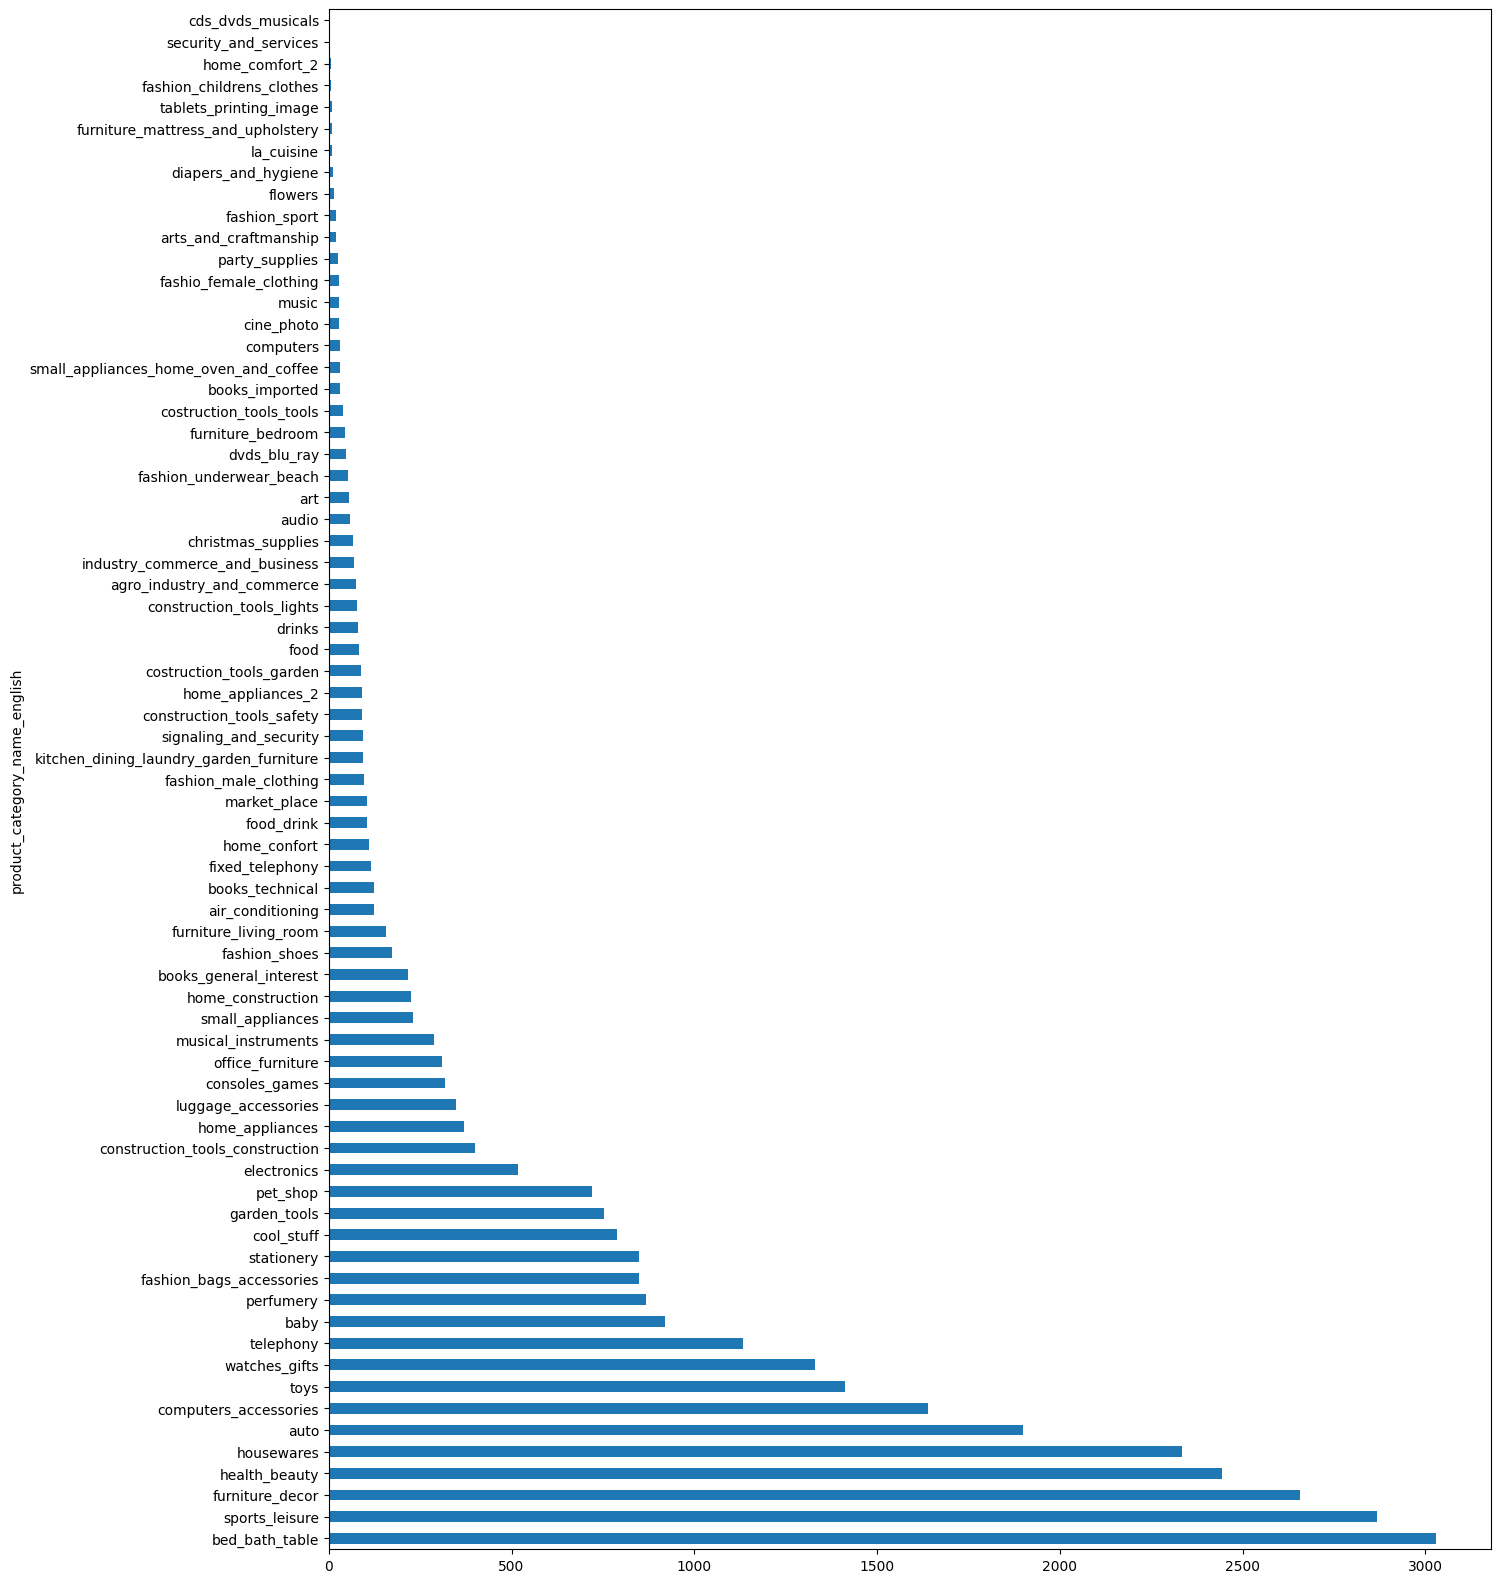

In [6]:
df_products['product_category_name_english'].value_counts().plot(kind='barh', figsize=(15,20))  

## Product Recommendation System

In [7]:
#Create new product dataframe
df_product_rating = df_products[['product_id', 'product_category_name_english']]
df_product_rating

,product_id,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumery
2,0d009643171aee696f4733340bc2fdd0,perfumery
3,b1eae565a61935e0011ee7682fef9dc9,perfumery
4,8da90b37f0fb171b4877c124f965b1f6,perfumery
...,...,...
32323,13b25797ad1e6d6c7cd3cbeb35f8ee7a,furniture_mattress_and_upholstery
32324,dc36a7859b743d8610a2bbbaea26ece9,furniture_mattress_and_upholstery
32325,107fde0930956120d1e13dd1062fbb46,furniture_mattress_and_upholstery
32326,726b4e18f00255e2e63491bcba3f60b8,furniture_mattress_and_upholstery


In [8]:
# def add_category(product_cat):
#     if product_cat == 'perfumery':
#         return product_cat + '_beauty'
#     else:
#         return product_cat

In [9]:
# #append product category name
# df_product_rating['product_category_name_english'].apply(add_category)

In [10]:
#Load review data
df_order_review = pd.read_csv('/Users/Dwika/My Projects/Final Project Purwadhika/Dataset/olist_order_reviews_dataset.csv')
df_order_review

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [11]:
df_order_item_list = df_order_items.merge(df_product_rating, on='product_id', how='left')
df_order_item_list = df_order_item_list[['order_id', 'product_id', 'product_category_name_english', 'price']]
df_order_item_list

,order_id,product_id,product_category_name_english,price
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,58.90
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,pet_shop,239.90
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,furniture_decor,199.00
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,perfumery,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,garden_tools,199.90
...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,housewares,299.99
112646,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,computers_accessories,350.00
112647,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,sports_leisure,99.90
112648,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,computers_accessories,55.99


In [12]:
#Merge order item list and reviews
df_order_item_review = df_order_item_list.merge(df_order_review, on='order_id', how='left')
df_order_item_review

,order_id,product_id,product_category_name_english,price,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,58.90,97ca439bc427b48bc1cd7177abe71365,5.0,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,pet_shop,239.90,7b07bacd811c4117b742569b04ce3580,4.0,NaN,NaN,2017-05-13 00:00:00,2017-05-15 11:34:13
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,furniture_decor,199.00,0c5b33dea94867d1ac402749e5438e8b,5.0,NaN,Chegou antes do prazo previsto e o produto sur...,2018-01-23 00:00:00,2018-01-23 16:06:31
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,perfumery,12.99,f4028d019cb58564807486a6aaf33817,4.0,NaN,NaN,2018-08-15 00:00:00,2018-08-15 16:39:01
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,garden_tools,199.90,940144190dcba6351888cafa43f3a3a5,5.0,NaN,Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59
...,...,...,...,...,...,...,...,...,...,...
113309,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,housewares,299.99,9185f849f32d82e216a4e025e0c50f5c,5.0,NaN,NaN,2018-05-11 00:00:00,2018-05-14 12:53:47
113310,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,computers_accessories,350.00,be803f6a93d64719fd685c1cc610918a,5.0,NaN,NaN,2018-07-24 00:00:00,2018-07-25 09:25:29
113311,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,sports_leisure,99.90,dbdd81cd59a1a9f94a10a990b4d48dce,5.0,NaN,NaN,2017-10-29 00:00:00,2017-10-29 21:33:52
113312,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,computers_accessories,55.99,fba117c9ac40d41ca7be54741f471303,5.0,NaN,Recebi o produto antes do prazo e corretamente.,2017-08-17 00:00:00,2017-08-18 12:24:05


In [13]:
df_order

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [14]:
#merge customer_id from df_order to df_order_item_review
df_order_item_review_list = df_order_item_review.merge(df_order[['order_id', 'customer_id']], on='order_id', how='left')
df_order_item_review_list.drop(columns=['review_id', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp'], inplace=True)

In [26]:
df_order_item_review_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113314 entries, 0 to 113313
Data columns (total 6 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       113314 non-null  object 
 1   product_id                     113314 non-null  object 
 2   product_category_name_english  111678 non-null  object 
 3   price                          113314 non-null  float64
 4   review_score                   112372 non-null  float64
 5   customer_id                    113314 non-null  object 
dtypes: float64(2), object(4)
memory usage: 5.2+ MB


In [30]:
df_order_item_review_list[df_order_item_review_list['review_score'].isna()]

,order_id,product_id,product_category_name_english,price,review_score,customer_id
32,00143d0f86d6fbd9f9b38ab440ac16f5,e95ee6822b66ac6058e2e4aff656071a,sports_leisure,21.33,NaN,2e45292979b9b2700ea09560eeb0f803
33,00143d0f86d6fbd9f9b38ab440ac16f5,e95ee6822b66ac6058e2e4aff656071a,sports_leisure,21.33,NaN,2e45292979b9b2700ea09560eeb0f803
34,00143d0f86d6fbd9f9b38ab440ac16f5,e95ee6822b66ac6058e2e4aff656071a,sports_leisure,21.33,NaN,2e45292979b9b2700ea09560eeb0f803
89,00335b686d693c7d72deeb12f8e89227,87b08e712cc4c9fe70984c5a24b29e2f,toys,63.90,NaN,d96e5c4400413a11fa8c9fd54be4a20b
257,00a77f9cc25b05b2004752593d7b8888,33bd5538a16d23f0a39da1c9bfd20980,home_confort,177.90,NaN,acb6cc6ec99086b8b53c858a0731c189
...,...,...,...,...,...,...
112878,feef9f21cf88daf192de972212d1c5d5,404a57563d487aecbc2b1a01d9b89aab,bed_bath_table,220.00,NaN,31a965e3f0fe26e844fe5dbcfac619e3
112894,fefacc66af859508bf1a7934eab1e97f,69c590f7ffc7bf8db97190b6cb6ed62e,computers,6729.00,NaN,f48d464a0baaea338cb25f816991ab1f
112950,ff18b518679a92dcb00e16fae93c6d59,461f43be3bdf8844e65b62d9ac2c7a5a,watches_gifts,146.00,NaN,74bff367924485ad26b79d31e5623874
113057,ff5b7f440481674b38554434638beebf,f0354861ab19941a53209c2acbb1b604,toys,94.90,NaN,e6ab213cb124524887ac41b8eaca9653


In [17]:
df_sampled = df_order_item_review_list.sample(n=10000, random_state=1)
df_sampled

,order_id,product_id,product_category_name_english,price,review_score,customer_id
69926,9ea646a381c6b15daefcacd20f9b89fa,aca2eb7d00ea1a7b8ebd4e68314663af,furniture_decor,69.90,5.0,c82490ee32b5cc7dce034641ac400244
15076,22230cb95aa16cf1615db1cf10a0ea2d,9df597081d18ddb0f995470f3203d467,computers_accessories,66.90,4.0,e4c5917984666dcd1fac843b5938b6a3
85920,c202ed8340693a8fb2e8bb2a43a1647e,8f2c823e12d58a9eec1a9191e3c34718,bed_bath_table,54.99,5.0,3adc6aa0846718c2bcf20950d1463a17
56652,8006800e5e68db2e9c4168dd8ce32b0e,431d674f9a4fbd0957ecf6ba3fcb6899,telephony,299.99,4.0,4f298aac1f56b29c32f9f5fc89b0bdf2
110446,f988dc242c742c1dfde32b24032b8fb3,dd0c5ce67727fde645d9a6c8cdc4970d,electronics,29.99,5.0,00788705370da606e9f8390258b9e977
...,...,...,...,...,...,...
31600,47399920ee7546351440204086acb793,58efb9b638561ce132216a9a612513e2,furniture_living_room,103.99,4.0,9bba9922e5c4a943364dd5884bfba750
73416,a656e365b72863ee3bd696c41c4fcc95,54d9ac713e253fa1fae9c8003b011c2a,cool_stuff,29.50,5.0,40dd50dbf3ac855ac5e321643a5fbe79
24650,37cd892c7a6275aecbe6dfdcee8de6b7,40876e499870e34fccde7cfb266a987d,construction_tools_construction,132.98,1.0,13fcb2215be199ed296dd6816ca6d393
71034,a1147112afc377c2361f5b27f17675f3,504f07e36481e5e72043def3d874b92a,sports_leisure,99.49,5.0,8d2fdef78ee20442bdfc5dca39b6562e


In [19]:
#Pivot user x Movie
user_rating_pivot = pd.pivot_table(df_sampled, index='customer_id', columns='product_id', values='review_score')
user_rating_pivot

product_id,000b8f95fcb9e0096488278317764d19,001795ec6f1b187d37335e1c4704762e,001b237c0e9bb435f2e54071129237e9,001b72dfd63e9833e8c02742adf472e3,00210e41887c2a8ef9f791ebc780cc36,00250175f79f584c14ab5cecd80553cd,002959d7a0b0990fe2d69988affcbc80,002af88741ba70c7b5cf4e4a0ad7ef85,003c0b8f6580c850bd2e32044d2ac307,004154251837f6ac124ad4374b3a8148,...,ffbe3df3856b1fef3fee8f1264105a89,ffc0b406806006602c5853b00ab5f7fd,ffc88104d219c1b767d566fd93653dd2,ffc9caf33e2d1e9f44e3e06da19085f7,ffcfaba393e8ef71937c6e8421bc2868,ffd2365fb8224dc66883df9351d65deb,ffd7628b0b0b98ebc549e8e4c54a59af,ffe8083298f95571b4a66bfbc1c05524,ffef256879dbadcab7e77950f4f4a195,fff0a542c3c62682f23305214eaeaa24
customer_id,,,,,,,,,,,,,,,,,,,,,
00050bf6e01e69d5c0fd612f1bcfb69c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
000bf8121c3412d3057d32371c5d3395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
001051abfcfdbed9f87b4266213a5df1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
001b4e9b73aa98a6276b241bfd496822,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
001f150aebb5d897f2059b0460c38449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffe7ffb7c7ae0d42808f387578426b3b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fff200ad56bd3e1caa576cce9d282672,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fff4fdd0de70a51d4e0f57a4c1c6bfae,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
#Normalize rating

avg_rating = user_rating_pivot.mean(axis=1)
avg_rating

customer_id
00050bf6e01e69d5c0fd612f1bcfb69c    5.0
000bf8121c3412d3057d32371c5d3395    5.0
001051abfcfdbed9f87b4266213a5df1    4.0
001b4e9b73aa98a6276b241bfd496822    4.0
001f150aebb5d897f2059b0460c38449    4.0
                                   ... 
ffe7ffb7c7ae0d42808f387578426b3b    1.0
fff200ad56bd3e1caa576cce9d282672    4.0
fff4fdd0de70a51d4e0f57a4c1c6bfae    5.0
fff906ecb75de5809be384e0f8d65e45    5.0
ffffa3172527f765de70084a7e53aae8    5.0
Length: 9749, dtype: float64

In [21]:
#Fill NaN with mean of user rating

#Normalize rating for each user by subtracting mean user rating, then fill NaN with 0 (if user didn't rate the movie)
rating_norm_pivot = user_rating_pivot.sub(avg_rating, axis=0).fillna(0) #mean = 0, std = 1
rating_norm_pivot

product_id,000b8f95fcb9e0096488278317764d19,001795ec6f1b187d37335e1c4704762e,001b237c0e9bb435f2e54071129237e9,001b72dfd63e9833e8c02742adf472e3,00210e41887c2a8ef9f791ebc780cc36,00250175f79f584c14ab5cecd80553cd,002959d7a0b0990fe2d69988affcbc80,002af88741ba70c7b5cf4e4a0ad7ef85,003c0b8f6580c850bd2e32044d2ac307,004154251837f6ac124ad4374b3a8148,...,ffbe3df3856b1fef3fee8f1264105a89,ffc0b406806006602c5853b00ab5f7fd,ffc88104d219c1b767d566fd93653dd2,ffc9caf33e2d1e9f44e3e06da19085f7,ffcfaba393e8ef71937c6e8421bc2868,ffd2365fb8224dc66883df9351d65deb,ffd7628b0b0b98ebc549e8e4c54a59af,ffe8083298f95571b4a66bfbc1c05524,ffef256879dbadcab7e77950f4f4a195,fff0a542c3c62682f23305214eaeaa24
customer_id,,,,,,,,,,,,,,,,,,,,,
00050bf6e01e69d5c0fd612f1bcfb69c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000bf8121c3412d3057d32371c5d3395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
001051abfcfdbed9f87b4266213a5df1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
001b4e9b73aa98a6276b241bfd496822,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
001f150aebb5d897f2059b0460c38449,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffe7ffb7c7ae0d42808f387578426b3b,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fff200ad56bd3e1caa576cce9d282672,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fff4fdd0de70a51d4e0f57a4c1c6bfae,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
#Create for Item based collaborative filtering
rating_norm_pivot = rating_norm_pivot.T
rating_norm_pivot

customer_id,00050bf6e01e69d5c0fd612f1bcfb69c,000bf8121c3412d3057d32371c5d3395,001051abfcfdbed9f87b4266213a5df1,001b4e9b73aa98a6276b241bfd496822,001f150aebb5d897f2059b0460c38449,001f6f1a5e902ad14e1f709a7215de11,002834b4d901534f48d9e9a72047b288,002905287304e28c0218389269b4759b,002fb8fc5ce64f8422fa2fe79986c783,00331de1659c7f4fb660c8810e6de3f5,...,ffb92ebafe7c270f1b4f8805f9e77447,ffbd25299d045182eee34c9493b5adec,ffbf13c83712766447907c175ecf4b61,ffd094af4643c7ac712acd36a56feccc,ffd940dedc35e4f459eddfa41291e824,ffe7ffb7c7ae0d42808f387578426b3b,fff200ad56bd3e1caa576cce9d282672,fff4fdd0de70a51d4e0f57a4c1c6bfae,fff906ecb75de5809be384e0f8d65e45,ffffa3172527f765de70084a7e53aae8
product_id,,,,,,,,,,,,,,,,,,,,,
000b8f95fcb9e0096488278317764d19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
001795ec6f1b187d37335e1c4704762e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
001b237c0e9bb435f2e54071129237e9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
001b72dfd63e9833e8c02742adf472e3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00210e41887c2a8ef9f791ebc780cc36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffd2365fb8224dc66883df9351d65deb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ffd7628b0b0b98ebc549e8e4c54a59af,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ffe8083298f95571b4a66bfbc1c05524,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
#Cosine similarity

from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(rating_norm_pivot)
cosine_sim_df = pd.DataFrame(cosine_sim, index=rating_norm_pivot.index, columns=rating_norm_pivot.index)

In [24]:
cosine_sim.shape

(6426, 6426)

In [25]:
#Recommendation function

def recommend(item):
    return cosine_sim_df[item].sort_values(ascending=False)[1:10]

recommend('001b72dfd63e9833e8c02742adf472e3')

product_id
a8d952e8e5436a6fe36d24c402d100de    0.0
a916e7d54e45e5db64b1c99b970d6f15    0.0
a910254bb741f98d6d98a8286d66d14f    0.0
a906f3b15e6e6333b408e9f8c34a6588    0.0
a90344a21959338905811b0c0248ac4a    0.0
a9028257171c93a8d948ff95a0082b0d    0.0
a9008450835cd38eabdf07eb6dd04bdd    0.0
a8fe47ad6f852f93cc92c7b408687de3    0.0
a8e9f87b1e5eb60206b63ff80c5ecadc    0.0
Name: 001b72dfd63e9833e8c02742adf472e3, dtype: float64